In [1]:
from qiskit import *
%matplotlib inline
IBMQ.load_account()



<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

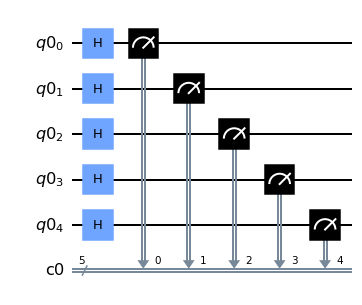

In [2]:
qr = QuantumRegister(5) # quantum bit register
cr = ClassicalRegister(5) # classical bit register
circuit = QuantumCircuit(qr, cr)
# create a quantum circuit containing 5 qubits
# all qubits in superposition (50%:50% chance to be in |0> or |1>) and independent of each other
circuit.h(qr)
circuit.measure(qr, cr)
circuit.draw(output='mpl', scale=1)

QASM SIMULATOR

In [3]:
### B1. Execute the Quantum Circuit in Quantum Computer Simulator
from qiskit.tools.visualization import plot_histogram
# let's execute our Quantum Circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend, shots=1024, memory=True).result()
# get all experiments (number of shots)
raw_data = result.get_memory()
print(raw_data)

['00100', '01010', '01111', '00101', '00101', '10000', '00001', '10100', '01011', '00010', '10111', '10101', '00110', '01001', '10010', '11011', '00011', '10100', '01011', '10001', '10000', '01111', '00001', '01000', '01100', '01011', '11001', '11100', '11111', '01010', '10010', '11111', '00100', '01110', '00100', '10001', '01111', '01111', '10011', '11011', '00101', '01101', '00111', '11101', '01101', '10110', '01110', '11110', '10010', '11110', '00000', '11100', '11001', '00001', '00100', '01000', '10110', '01110', '01101', '01011', '01010', '00001', '11001', '11111', '11111', '11000', '10111', '10110', '11110', '00110', '10111', '00100', '10000', '10000', '00010', '10011', '11100', '11101', '01101', '00111', '01000', '00011', '10001', '01101', '10110', '11011', '10011', '11100', '10110', '00001', '11001', '11111', '01100', '11010', '10001', '00100', '11011', '00001', '01001', '00010', '10110', '00001', '01011', '01010', '11111', '01100', '11110', '10101', '00100', '00110', '00000', 

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
counts = result.get_counts()
print(counts)

{'11010': 20, '00111': 40, '10011': 26, '01110': 30, '11110': 28, '11100': 41, '11001': 42, '01100': 26, '01000': 32, '11101': 32, '10100': 30, '00010': 36, '01101': 29, '00001': 31, '01111': 44, '10001': 35, '01010': 30, '00110': 26, '00000': 21, '01011': 36, '11000': 31, '10111': 23, '10000': 39, '10101': 32, '00101': 32, '01001': 34, '10110': 27, '11111': 20, '10010': 29, '11011': 41, '00100': 42, '00011': 39}


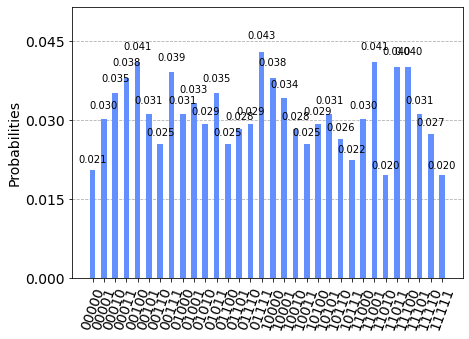

In [5]:
plot_histogram(counts)

Using real Quantum Computer

In [8]:
from qiskit.tools.monitor import job_monitor
# load saved credential to access IBM Quantum Computing Experience on IBM Cloud
IBMQ.load_account()
# define the backend IBM quantum computer simulator to use
#provider = IBMQ.get_provider('ibm-q')
#backend = provider.get_backend('ibmq_manila’)
provider = IBMQ.load_account() 
backend = provider.backends.ibmq_manila
job = execute(circuit, backend=backend, shots=1024, memory=True)
job_monitor(job)

ibmqfactory.load_account:WARNING:2022-09-22 03:50:28,641: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2022-09-22 03:50:31,418: Credentials are already in use. The existing account in the session will be replaced.
/tmp/ipykernel_84/671147477.py:8: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  backend = provider.backends.ibmq_manila


Job Status: job has successfully run


In [10]:
raw_data1 = job.result().get_memory()
print(raw_data1)

['10111', '01100', '00101', '11110', '00101', '01010', '01010', '11011', '01000', '11001', '00101', '01111', '01010', '11000', '10011', '00111', '01101', '11010', '01010', '00000', '00010', '01100', '11000', '10000', '10010', '10100', '01111', '11010', '00000', '10111', '11011', '11100', '01000', '00100', '00010', '00011', '01110', '11101', '10101', '10010', '01000', '11100', '01001', '00100', '00100', '11000', '00111', '00111', '01011', '10101', '10111', '10100', '11100', '00010', '10100', '10001', '01100', '11110', '01100', '00110', '00001', '10010', '00100', '00010', '00100', '00100', '11101', '00000', '10111', '11111', '11000', '10000', '10100', '01101', '01010', '11011', '10000', '00001', '10000', '10000', '01001', '11011', '01100', '00010', '11011', '00111', '10111', '10100', '01010', '01010', '01000', '00010', '00011', '00110', '01010', '01001', '10010', '11111', '00101', '11101', '11010', '11100', '00010', '10011', '00011', '01001', '01010', '01000', '00010', '00110', '01110', 

In [11]:
result = job.result()
counts = result.get_counts()
print(counts)

{'00000': 37, '00001': 43, '10000': 32, '10001': 21, '10010': 44, '10011': 30, '10100': 30, '10101': 30, '10110': 26, '10111': 35, '11000': 36, '11001': 23, '11010': 42, '11011': 25, '11100': 28, '11101': 22, '11110': 33, '11111': 37, '00010': 41, '00011': 33, '00100': 39, '00101': 33, '00110': 32, '00111': 31, '01000': 35, '01001': 27, '01010': 42, '01011': 24, '01100': 26, '01101': 23, '01110': 29, '01111': 35}
